О данных: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/swiss.html



небольшое пояснение:
Что такое факторный анализ?

В современной статистике этот метод анализа данных используется для выявления скрытых факторов, которые оказывают влияние на наблюдаемые переменные. Основная идея факторного анализа заключается в том, что множество переменных можно свести к меньшему числу факторов, которые объясняют основные тенденции и связи между этими переменными.

Одной из важнейших задач, которую можно решить с помощью факторного анализа, является выявление основных факторов, которые оказывают влияние на изменение показателей в рамках определенной выборки. Кроме того, факторный анализ может использоваться для определения взаимосвязей между различными переменным

Метод главных компонент (PCA) — это метод факторного анализа, который используется для выделения наиболее важных факторов из большого количества переменных. Он основывается на поиске линейных комбинаций переменных, которые объясняют наибольшую долю изменчивости данных. Эти линейные комбинации называются главными компонентами.

Метод наименьших квадратов (PLS — Partial Least Squares):
Этот метод широко используется для решения задач множественной регрессии в большой размерности данных. Он позволяет свести большой набор измерений к более небольшому количеству значимых компонент, которые лучше всего описывают зависимости между ними.

Метод максимального правдоподобия (MLE — Maximum Likelihood Estimation):
Этот метод направлен на оценку параметров статистической модели на основе имеющихся данных. Он позволяет определить значение параметров, наиболее вероятно соответствующее наблюдаемым данным.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/Swiss%20Fertility.csv', sep=';', decimal=',')
df.head()

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [8]:
#ренейминг
df.rename(columns={'Unnamed: 0': 'Cantons'}, inplace=True)

In [16]:
df.iloc[:, 1:].corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant_Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


## 1

In [27]:
#стандартизация
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled

df_scaled = preprocessing.scale(df.iloc[:,1:])

df_scaled[:5]

array([[ 0.8138349 , -1.49809105, -0.18870461,  0.10736079, -0.75581046,
         0.78341571],
       [ 1.04849895, -0.2474407 , -1.32901961, -0.20801153,  1.05907526,
         0.78341571],
       [ 1.80913415, -0.4877792 , -1.45572128, -0.62850797,  1.26654617,
         0.08934336],
       [ 1.26697928, -0.63020202, -0.56880961, -0.41825975, -0.1787214 ,
         0.12404697],
       [ 0.54680339, -0.31865211,  0.06469872,  0.42273312, -0.87214929,
         0.22815783]])

In [23]:
#PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
pca.explained_variance_ratio_

array([0.53329283, 0.19805137, 0.1412683 ])

In [24]:
factors = pca.transform(df_scaled)
factors

array([[ 0.36355156,  1.39942043, -0.8597075 ],
       [-1.6341755 ,  1.02604695,  0.5478672 ],
       [-2.1042002 ,  0.7460236 ,  0.47268306],
       [-0.74760789,  0.59589165, -0.57915951],
       [ 0.38152761,  0.44884479, -0.62826125],
       [-1.36921903,  2.29187838,  0.35052739],
       [-1.72432731,  1.1277524 ,  0.43217275],
       [-2.18253588,  1.76414415,  0.39828932],
       [-1.51766939,  0.62257236,  0.70797265],
       [-0.96155561,  1.89512185,  0.66477077],
       [-2.01128901,  1.541357  ,  0.40582521],
       [ 0.80506589, -1.35892381, -0.33733946],
       [-0.17520904, -0.8818744 , -0.8329215 ],
       [ 0.23562425,  0.48914597, -0.80839843],
       [ 0.42035821, -1.07192701, -0.92816624],
       [-0.5988956 , -0.30086168, -0.85782563],
       [ 0.46581609,  0.18010264, -0.96616288],
       [ 2.78442448,  0.63703185,  0.41036853],
       [ 3.42909196, -2.07525184,  0.24487202],
       [ 0.15436533, -0.65730064, -0.78295033],
       [ 0.71390686, -0.89333076, -0.631

## 2

In [45]:
df_fa = FactorAnalysis(n_components=2)
df_fa.fit(df_scaled)

pd.DataFrame(df_fa.components_, columns=df.iloc[:,1:].columns)

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
0,-0.937748,-0.562404,0.786850,0.766248,-0.516523,-0.338293
1,0.245096,-0.701821,0.362441,0.271108,-0.119260,0.386190


интересно, что у людей с образованием детская смертность высокая, а также фертильность ниже.

то есть, получается 2 фактора: образованные люди с низкой фертильностью и необразованные люди с фертильностью вышше

In [53]:
# тут я поковырялся по рессурсам из интернета и нашел Факторную нагрузку,
# коэффициент, который показывает, насколько сильно каждый показатель влияет на данный фактор

# Определение количества факторов
fa = FactorAnalyzer(n_factors=2, rotation=None)

# Построение модели
fa.fit(df_scaled)

# Получение факторных нагрузок и вариантов объяснения
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=df.iloc[:,1:].columns)
variance = pd.DataFrame({'Variance': fa.get_factor_variance()}, index=['Factor 1', 'Factor 2', 'Factor 3'])

print('Факторные нагрузки:\n', loadings)
print('\nВарианты объяснения:\n', variance)

Факторные нагрузки:
                   Factor 1  Factor 2
Fertility         0.854052  0.524927
Agriculture       0.739690 -0.499463
Examination      -0.896742  0.144556
Education        -0.743460  0.096219
Catholic          0.507412  0.049629
Infant_Mortality  0.214422  0.452914

Варианты объяснения:
                                            Variance
Factor 1   [2.9368689531570857, 0.7627602729514171]
Factor 2  [0.4894781588595143, 0.12712671215856952]
Factor 3   [0.4894781588595143, 0.6166048710180838]


In [43]:
#значения факторов
pd.Series(df_fa.noise_variance_, df.iloc[:,1:].columns)


Fertility           0.061741
Agriculture         0.191887
Examination         0.248986
Education           0.339383
Catholic            0.718931
Infant_Mortality    0.735943
dtype: float64

А может наоборт, там где смертность выше там люди образованнее?


In [47]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)
pd.DataFrame(fa.components_, columns=df.iloc[:,1:].columns)

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
0,-0.849643,-0.668730,0.838057,0.887996,-0.473847,-0.235409
1,0.204352,-0.060695,-0.151733,0.371261,0.744381,0.234170
2,-0.379035,0.527681,-0.258278,-0.041596,0.242989,-0.429940


In [49]:
fa = FactorAnalyzer(rotation='varimax') # вращение
fa.fit(df.iloc[:,1:])
ev, v = fa.get_eigenvalues() # собственные векторы

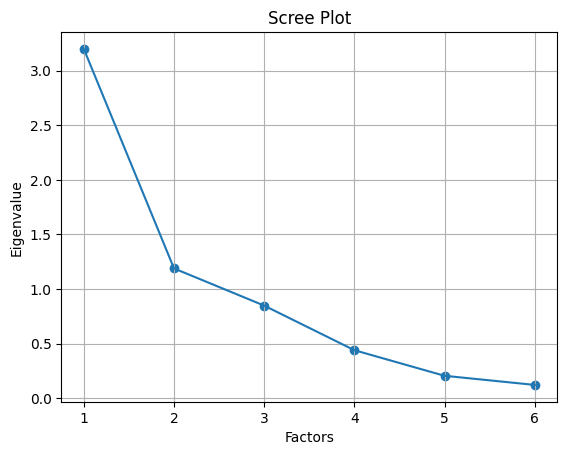

In [51]:
plt.scatter(range(1,df.iloc[:,1:].shape[1]+1),ev)
plt.plot(range(1,df.iloc[:,1:].shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Из графика понятно что 2-3 фактора будет в самый раз